# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../recruitment_data_raw.csv')

In [3]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Melihat informasi umum dataset
print("\nInformasi dataset:\n")
print(df.info())


Informasi dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB
None


In [5]:
# Melihat statistik deskriptif
print("\nStatistik deskriptif:\n")
print(df.describe(include='all'))


Statistik deskriptif:

               Age       Gender  EducationLevel  ExperienceYears  \
count  1500.000000  1500.000000     1500.000000      1500.000000   
mean     35.148667     0.492000        2.188000         7.694000   
std       9.252728     0.500103        0.862449         4.641414   
min      20.000000     0.000000        1.000000         0.000000   
25%      27.000000     0.000000        2.000000         4.000000   
50%      35.000000     0.000000        2.000000         8.000000   
75%      43.000000     1.000000        3.000000        12.000000   
max      50.000000     1.000000        4.000000        15.000000   

       PreviousCompanies  DistanceFromCompany  InterviewScore   SkillScore  \
count         1500.00000          1500.000000     1500.000000  1500.000000   
mean             3.00200            25.505379       50.564000    51.116000   
std              1.41067            14.567151       28.626215    29.353563   
min              1.00000             1.031376      

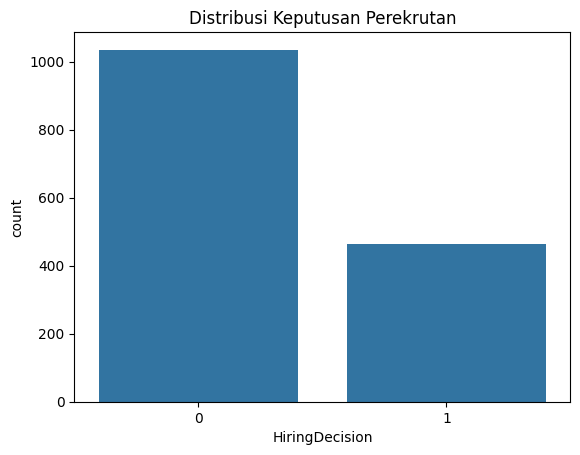

In [6]:
# Melihat distribusi target
sns.countplot(x='HiringDecision', data=df)
plt.title('Distribusi Keputusan Perekrutan')
plt.show()

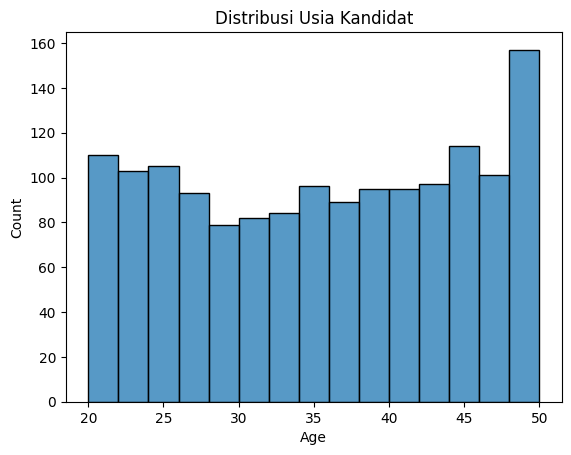

In [7]:
# Melihat distribusi usia
sns.histplot(df['Age'], bins=15)
plt.title('Distribusi Usia Kandidat')
plt.show()

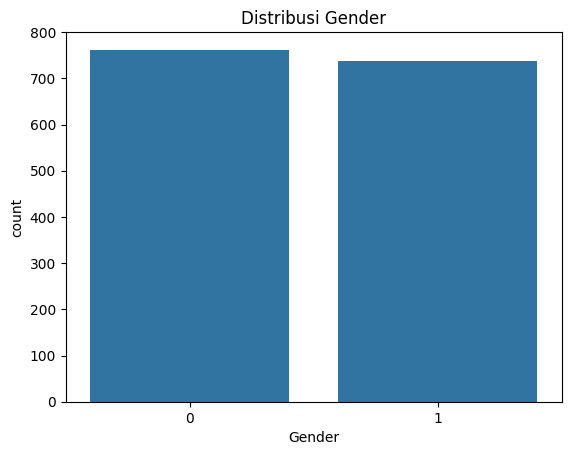

In [8]:
# Melihat distribusi gender
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.show()

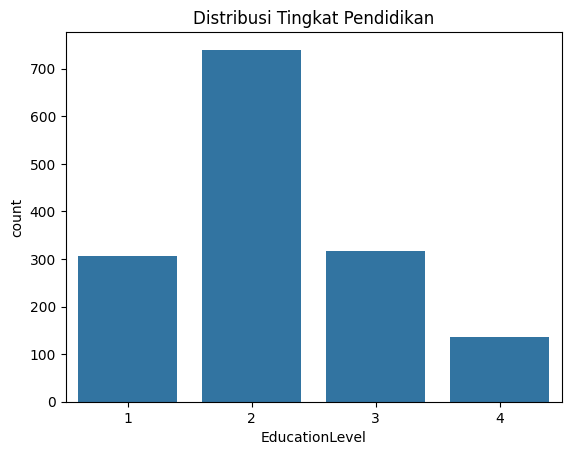

In [9]:
# Melihat distribusi tingkat pendidikan
sns.countplot(x='EducationLevel', data=df)
plt.title('Distribusi Tingkat Pendidikan')
plt.show()

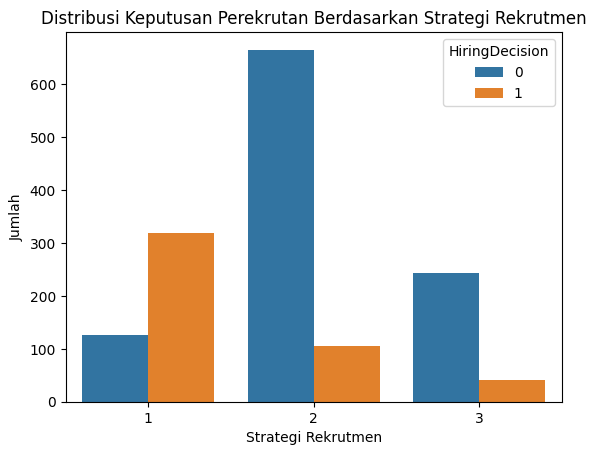

In [10]:
# Visualisasi distribusi keputusan perekrutan berdasarkan strategi rekrutmen
sns.countplot(x='RecruitmentStrategy', hue='HiringDecision', data=df)
plt.title('Distribusi Keputusan Perekrutan Berdasarkan Strategi Rekrutmen')
plt.xlabel('Strategi Rekrutmen')
plt.ylabel('Jumlah')
plt.show()

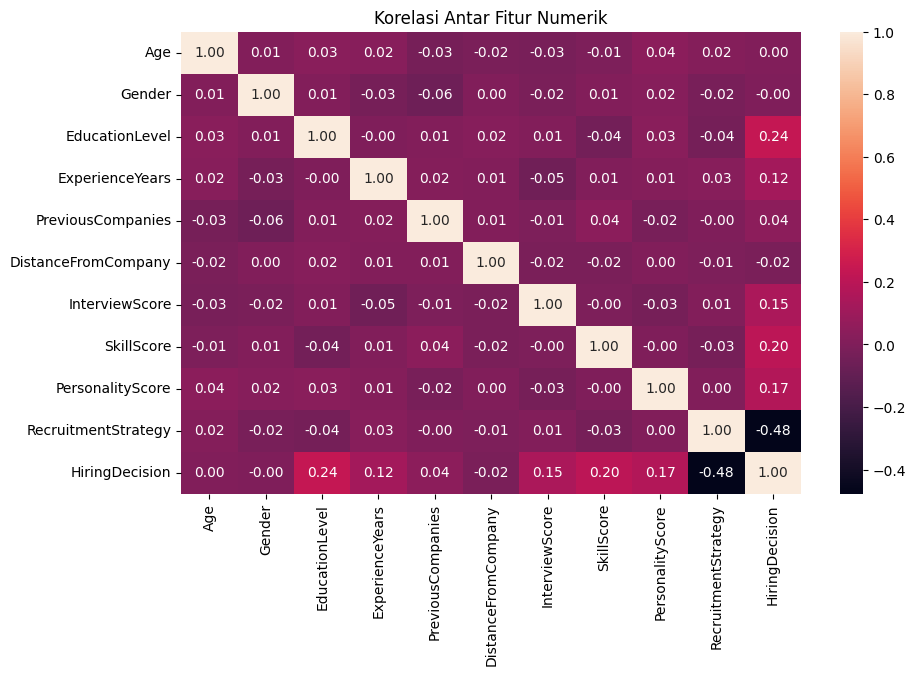

In [11]:
# Melihat korelasi antar fitur numerik
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# 1. Menghapus atau Menangani Missing Values
if df.isnull().sum().sum() > 0:
    df = df.dropna()

In [13]:
# 2. Menghapus Data Duplikat
df = df.drop_duplicates()

In [14]:
# 3. Deteksi dan Penanganan Outlier (menggunakan IQR method)
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany',
                'InterviewScore', 'SkillScore', 'PersonalityScore']

df = remove_outliers_iqr(df, numeric_cols)

In [15]:
# 4. Binning
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20s', '30s', '40s', '50s'])
df['ExperienceLevel'] = pd.cut(df['ExperienceYears'], bins=[0, 3, 7, 15, 30],
                               labels=['Junior', 'Mid', 'Senior', 'Expert'])

In [16]:
# 5. One-hot Encoding
df = pd.get_dummies(df, columns=['AgeGroup', 'ExperienceLevel', 'RecruitmentStrategy'], drop_first=True)

In [17]:
# 6. Standarisasi
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])